In [3]:
import pandas as pd
import numpy as np

ex_1 = pd.read_excel('XLS698-XLS-ENG.xls', sheet_name = 'Exhibit 1', skiprows=2)

In [4]:
ex_1 = ex_1.dropna()


In [5]:
ex_1


,Coupon Rate (%),Maturity Date,Current Price
0,3,2/15/2004,101.0544
1,2.125,8/15/2004,100.9254
2,1.5,2/15/2005,99.8942
3,6.5,8/15/2005,109.0934
4,5.625,2/15/2006,108.4380
5,2.375,8/15/2006,99.7848
6,6.25,2/15/2007,111.7184
7,3.25,8/15/2007,101.0841
8,3,2/15/2008,99.1692
9,3.25,8/15/2008,99.2710


In [6]:
Market_price = ex_1['Current Price']

In [7]:
cashflows = np.zeros((52,52))

In [8]:
cashflows

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
ex_1.iloc[0,0]

3

In [10]:
for i in range(52):
    for j in range(i+1):
        if j == i:
            cashflows[i][j]= ex_1.iloc[i,0]/2 + 100
        else:
            cashflows[i][j]= ex_1.iloc[i,0]/2

In [13]:
market_price = Market_price.values

In [678]:
cashflows

array([[101.5   ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [  1.0625, 101.0625,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [  0.75  ,   0.75  , 100.75  , ...,   0.    ,   0.    ,   0.    ],
       ...,
       [  2.75  ,   2.75  ,   2.75  , ..., 102.75  ,   0.    ,   0.    ],
       [  2.625 ,   2.625 ,   2.625 , ...,   2.625 , 102.625 ,   0.    ],
       [  3.0625,   3.0625,   3.0625, ...,   3.0625,   3.0625, 103.0625]])

In [714]:
def get_krd_price(mat,shock):
    cf = np.zeros((52,52))
    mat=int((mat-0.50)*2)
    shock=shock*100
    for i in range(52):
        for j in range(i+1):
            if j == i:
                cf[i][j]= ex_1.iloc[i,0]/2 + 100
            else:
                cf[i][j]= ex_1.iloc[i,0]/2
    for i in range(mat+1):
        if i == mat :
            cf[mat][i]=(ex_1.iloc[mat,0]+shock)/2 + 100 
        else :
            cf[mat][i]=(ex_1.iloc[mat,0]+shock)/2
    cf_inv = np.linalg.inv(cf)
    discount_krd_prices = np.dot(cf_inv,mp)
    return discount_krd_prices

In [735]:
def get_krd2(mat,shock):
    krd_p=get_krd_price(mat,shock).reshape(52,)
    w=1000000/sum(discount_prices.reshape(52,))
    krd_diff = krd_p - discount_prices.reshape(52,)
    krd = sum(krd_diff)*w
    return krd

In [738]:
get_krd_price(20,0.005)
krd_diff = get_krd_price(10,0.005) - discount_prices
sum(krd_diff*35452.89820148714)

array([-404.48301164])

In [745]:
get_krd2(10,0.005)

-404.4830116407338

In [14]:
mp= market_price.reshape(52,1)

In [15]:
cashflows_inv = np.linalg.inv(cashflows)

In [16]:
discount_prices = np.dot(cashflows_inv,mp)

In [17]:
discount_prices

array([[0.99560985],
       [0.98817627],
       [0.97673807],
       [0.96340626],
       [0.94737455],
       [0.92896974],
       [0.90756404],
       [0.88741808],
       [0.86479128],
       [0.84155889],
       [0.81937986],
       [0.79400038],
       [0.76934326],
       [0.74650741],
       [0.72406151],
       [0.7012044 ],
       [0.68007172],
       [0.66038132],
       [0.64338905],
       [0.62775437],
       [0.6117382 ],
       [0.58534032],
       [0.54618527],
       [0.52867849],
       [0.50984615],
       [0.49271149],
       [0.47604957],
       [0.45755133],
       [0.44431472],
       [0.42935291],
       [0.41285297],
       [0.39874372],
       [0.38618007],
       [0.37199905],
       [0.36048081],
       [0.34928736],
       [0.33805336],
       [0.32785897],
       [0.31779099],
       [0.3094697 ],
       [0.3012222 ],
       [0.2902055 ],
       [0.28045321],
       [0.27259259],
       [0.26759827],
       [0.25775556],
       [0.25127702],
       [0.244

In [179]:
yields = np.zeros((52,1))
for i in range(52):
    yields[i][0]= 2*((1/discount_prices[i][0])**(1/(i+1))-1)

In [180]:
yields

array([[0.00881901],
       [0.01192962],
       [0.01575289],
       [0.01872718],
       [0.02174163],
       [0.02471112],
       [0.02790463],
       [0.03008378],
       [0.03254351],
       [0.03479914],
       [0.0365495 ],
       [0.03881711],
       [0.04075084],
       [0.04220336],
       [0.0435172 ],
       [0.0448653 ],
       [0.04587793],
       [0.04663971],
       [0.04696459],
       [0.04710684],
       [0.04735682],
       [0.0492849 ],
       [0.0532886 ],
       [0.05382614],
       [0.05462435],
       [0.05519651],
       [0.05574292],
       [0.05663463],
       [0.0567362 ],
       [0.05716684],
       [0.05789727],
       [0.05829829],
       [0.05850305],
       [0.05902262],
       [0.05916195],
       [0.05929877],
       [0.05949207],
       [0.05956296],
       [0.05966029],
       [0.05951302],
       [0.05939697],
       [0.05978892],
       [0.06001532],
       [0.05996206],
       [0.05945634],
       [0.05982261],
       [0.05964657],
       [0.059

In [181]:
yield_comp = np.zeros((13,2))
mat = np.zeros((13,1))

In [182]:
BEY = yields*2

In [183]:
for i in range(10):
    yield_comp[i][0] = i + 1
    mat[i][0] = i + 1

In [184]:
yield_comp[10][0]=15
yield_comp[11][0]=20
yield_comp[12][0]=25
mat[10][0]=15
mat[11][0]=20
mat[12][0]=25


In [185]:
yield_comp

array([[ 1.,  0.],
       [ 2.,  0.],
       [ 3.,  0.],
       [ 4.,  0.],
       [ 5.,  0.],
       [ 6.,  0.],
       [ 7.,  0.],
       [ 8.,  0.],
       [ 9.,  0.],
       [10.,  0.],
       [15.,  0.],
       [20.,  0.],
       [25.,  0.]])

In [186]:
yield_comp[2]

array([3., 0.])

In [198]:
for i in range(13):
    j = int(yield_comp[i][0])
    yield_comp[i][1]=yields[(j*2)-1][0]

In [199]:
yield_comp

array([[1.00000000e+00, 1.19296219e-02],
       [2.00000000e+00, 1.87271766e-02],
       [3.00000000e+00, 2.47111193e-02],
       [4.00000000e+00, 3.00837825e-02],
       [5.00000000e+00, 3.47991365e-02],
       [6.00000000e+00, 3.88171106e-02],
       [7.00000000e+00, 4.22033624e-02],
       [8.00000000e+00, 4.48653032e-02],
       [9.00000000e+00, 4.66397126e-02],
       [1.00000000e+01, 4.71068357e-02],
       [1.50000000e+01, 5.71668410e-02],
       [2.00000000e+01, 5.95130228e-02],
       [2.50000000e+01, 5.91282460e-02]])

In [189]:
yield_f=np.zeros((13,1))
for i in range(13):
    yield_f[i][0]=yield_comp[i][1]

In [190]:
yield_f

array([[0.01192962],
       [0.01872718],
       [0.02471112],
       [0.03008378],
       [0.03479914],
       [0.03881711],
       [0.04220336],
       [0.0448653 ],
       [0.04663971],
       [0.04710684],
       [0.05716684],
       [0.05951302],
       [0.05912825]])

In [191]:
ex_4 = pd.read_excel('XLS698-XLS-ENG.xls', sheet_name = 'Exhibit 4 ', skiprows=2)
ex_4= ex_4.dropna()
ex_4['Model Prediction (BEY)'] = ex_4['Model Prediction (BEY)'].str.rstrip('%').astype(float)

In [192]:
deutsch = ex_4['Model Prediction (BEY)'].values.reshape(13,1)

In [193]:
deutsch = deutsch * 0.01

In [194]:
long_short = deutsch - yield_f

In [196]:
long_short #positif = short et negatif = long

array([[ 5.13378120e-04],
       [-1.76645558e-07],
       [-6.01119281e-04],
       [-4.18782495e-04],
       [-3.45136498e-04],
       [-2.60110576e-04],
       [-2.07362363e-04],
       [-1.88303164e-04],
       [-1.11712612e-04],
       [ 1.64343295e-07],
       [-6.84100842e-06],
       [ 3.97716051e-06],
       [ 1.86754009e-04]])

# Question 2 : Cubic Splines

In [200]:
from scipy.interpolate import CubicSpline

In [201]:
deutsch

array([[0.012443],
       [0.018727],
       [0.02411 ],
       [0.029665],
       [0.034454],
       [0.038557],
       [0.041996],
       [0.044677],
       [0.046528],
       [0.047107],
       [0.05716 ],
       [0.059517],
       [0.059315]])

In [202]:
#cs_yield=np.array([deutsch[1],deutsch[4],deutsch[9],deutsch[10],deutsch[11]])
cs_yield=np.array([yield_f[1],yield_f[4],yield_f[9],yield_f[10],yield_f[11]])

In [203]:
cs_yield

array([[0.01872718],
       [0.03479914],
       [0.04710684],
       [0.05716684],
       [0.05951302]])

In [204]:
cs_maturity=np.array([2,5,10,15,20])

In [214]:
cs = CubicSpline(cs_maturity,cs_yield, bc_type='natural')

In [215]:
cs.x

array([ 2.,  5., 10., 15., 20.])

In [216]:
all_maturities = np.arange(0.5,26.5,0.5)

In [217]:
all_maturities

array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
       11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
       17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ,
       22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. ])

In [218]:
interpolated_yields = cs(all_maturities)

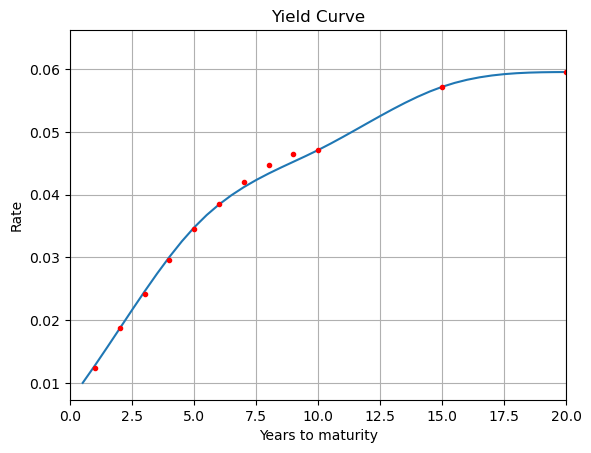

In [221]:
import matplotlib.pyplot as plt
plt.plot(all_maturities,interpolated_yields,'-',label='Yield curve')
plt.plot(mat,deutsch,'r.',label='Yield curve')

plt.xlabel('Years to maturity')
plt.ylabel('Rate')
plt.title('Yield Curve')
plt.xlim(0,20)
plt.grid()

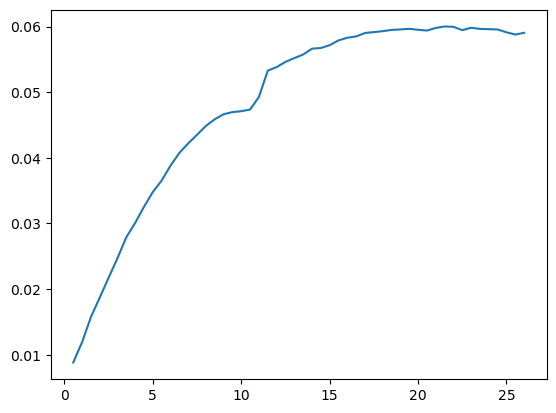

In [222]:
plt.plot(all_maturities, yields)

In [54]:
BEY1 = BEY.flatten()

In [55]:
BEY1

array([0.00881901, 0.01192962, 0.01575289, 0.01872718, 0.02174163,
       0.02471112, 0.02790463, 0.03008378, 0.03254351, 0.03479914,
       0.0365495 , 0.03881711, 0.04075084, 0.04220336, 0.0435172 ,
       0.0448653 , 0.04587793, 0.04663971, 0.04696459, 0.04710684,
       0.04735682, 0.0492849 , 0.0532886 , 0.05382614, 0.05462435,
       0.05519651, 0.05574292, 0.05663463, 0.0567362 , 0.05716684,
       0.05789727, 0.05829829, 0.05850305, 0.05902262, 0.05916195,
       0.05929877, 0.05949207, 0.05956296, 0.05966029, 0.05951302,
       0.05939697, 0.05978892, 0.06001532, 0.05996206, 0.05945634,
       0.05982261, 0.05964657, 0.05960339, 0.05955713, 0.05912825,
       0.05878319, 0.05904868])

In [56]:
BEY1.shape

(52,)

In [57]:
all_maturities.shape

(50,)

In [123]:
new_maturities = np.array([5,20])
new_yield = np.array([yield_f[4],yield_f[11]])

In [124]:
cs2=CubicSpline(new_maturities,new_yield)

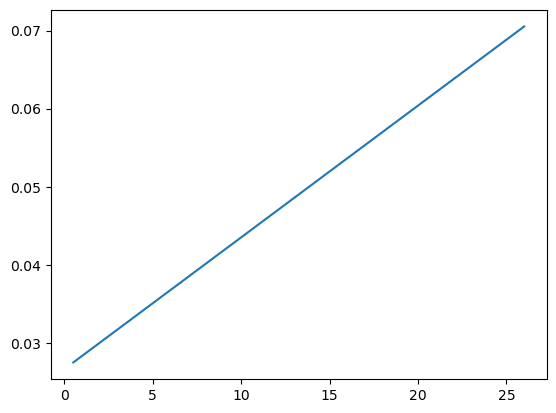

In [125]:
plt.plot(all_maturities,cs2(all_maturities))

# Question 3 : Nelson-Siegel-Svensson model

In [133]:
from scipy.optimize import minimize

In [134]:
def nelson_siegel_svensson(maturities, beta0, beta1, beta2, beta3, tau1, tau2):
    term1 = beta0
    term2 = beta1 * (1 - np.exp(-maturities / tau1)) / (maturities / tau1)
    term3 = beta2 * ((1 - np.exp(-maturities / tau1)) / (maturities / tau1) - np.exp(-maturities / tau1))
    term4 = beta3 * ((1 - np.exp(-maturities / tau2)) / (maturities / tau2) - np.exp(-maturities / tau2))
    return term1 + term2 + term3 + term4

In [135]:
def objective(params, maturities, yields_observed):
    beta0, beta1, beta2, beta3, tau1, tau2 = params
    yields_model = nelson_siegel_svensson(maturities, beta0, beta1, beta2, beta3, tau1, tau2)
    return np.sum((yields_observed - yields_model) ** 2)

In [144]:
mat = mat.reshape(13,1)

In [145]:
mat

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [15.],
       [20.],
       [25.]])

In [146]:
yield_f

array([[0.0119652 ],
       [0.01881485],
       [0.02486378],
       [0.03031004],
       [0.03510188],
       [0.0391938 ],
       [0.04264864],
       [0.04536853],
       [0.04718353],
       [0.0476616 ],
       [0.05798385],
       [0.06039847],
       [0.06000228]])

In [317]:
initial_params = [0.03, 0.015, 0.005, 0.003, 3, 6]

result = minimize(objective, initial_params, args=(cs_maturity, cs_yield.reshape(5,)), method='L-BFGS-B')

In [318]:
beta0_opt, beta1_opt, beta2_opt, beta3_opt, tau1_opt, tau2_opt = result.x

In [319]:
result.x

array([ 0.07594016, -0.07290567, -0.0093446 , -0.01382778,  3.001696  ,
        6.00023927])

In [444]:
yield_curve_fitted = nelson_siegel_svensson(all_maturities, beta0_opt, beta1_opt, beta2_opt, beta3_opt, tau1_opt, tau2_opt)

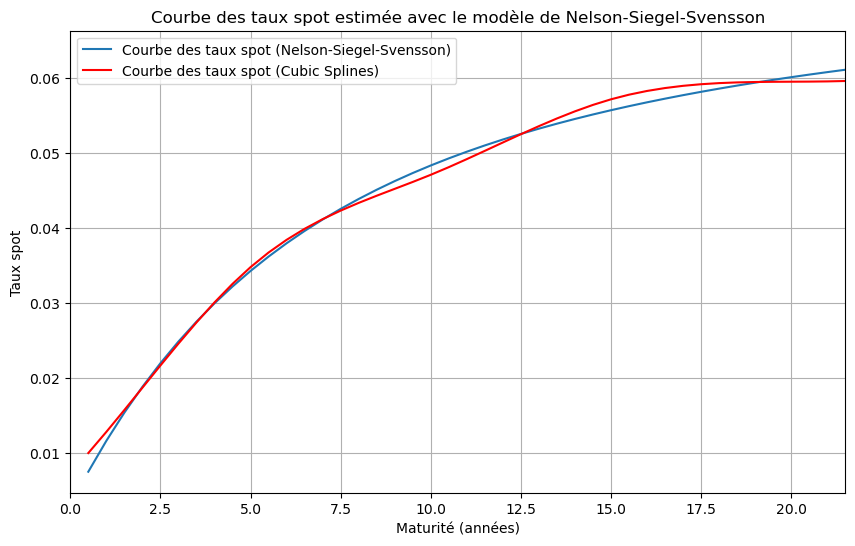

In [530]:
plt.figure(figsize=(10, 6))
plt.plot(all_maturities, yield_curve_fitted, label='Courbe des taux spot (Nelson-Siegel-Svensson)')
plt.plot(all_maturities,interpolated_yields,'r-',label='Courbe des taux spot (Cubic Splines)')
#plt.scatter(mat, yield_f, color='red', label='Taux observés', zorder=5)
#plt.scatter(all_maturities, yields, color='purple', label='Taux observés', zorder=5)
plt.xlabel('Maturité (années)')
plt.ylabel('Taux spot')
plt.title('Courbe des taux spot estimée avec le modèle de Nelson-Siegel-Svensson')
plt.xlim(0,21.5)
plt.legend()
plt.grid(True)
plt.show()

In [329]:
factor_beta0_opt = np.ones_like(all_maturities)
factor_loading_slope = (1 - np.exp(- all_maturities / tau1_opt)) / ( all_maturities / tau1_opt)
factor_loading_curvature1 = (1 - np.exp(- all_maturities / tau1_opt)) / ( all_maturities / tau1_opt) - np.exp(- all_maturities / tau1_opt)
factor_loading_curvature2 = (1 - np.exp(- all_maturities / tau2_opt)) / ( all_maturities / tau2_opt) - np.exp(- all_maturities / tau2_opt)

In [401]:
spot_contribution_level = beta0_opt * np.ones_like(all_maturities)
spot_contribution_slope = beta1_opt * factor_loading_slope
spot_contribution_curvature1 = beta2_opt * factor_loading_curvature1
spot_contribution_curvature2 = beta3_opt * factor_loading_curvature2

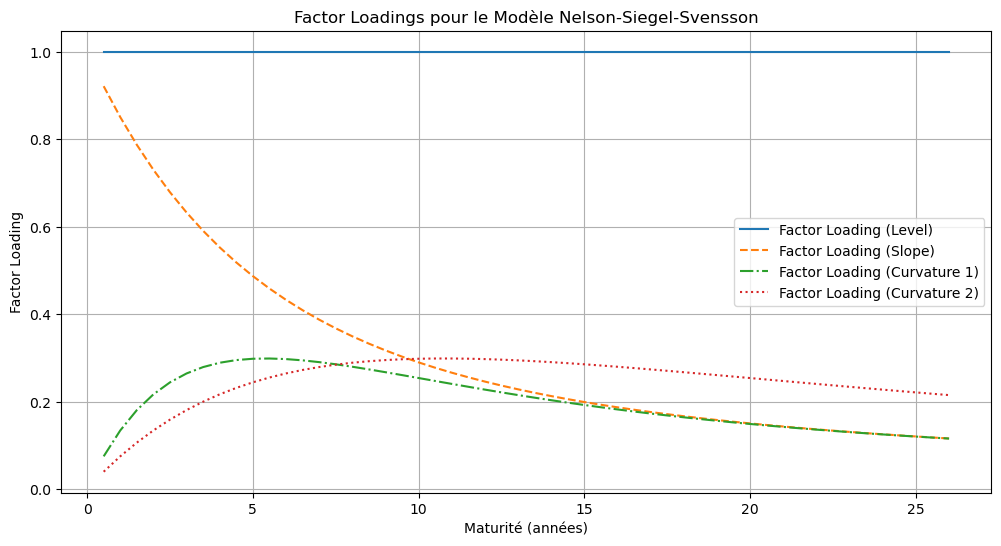

In [402]:
plt.figure(figsize=(12, 6))
plt.plot(all_maturities, factor_beta0_opt, label="Factor Loading (Level)", linestyle='-')
plt.plot(all_maturities, factor_loading_slope, label="Factor Loading (Slope)", linestyle='--')
plt.plot(all_maturities, factor_loading_curvature1, label="Factor Loading (Curvature 1)", linestyle='-.')
plt.plot(all_maturities, factor_loading_curvature2, label="Factor Loading (Curvature 2)", linestyle=':')
plt.xlabel("Maturité (années)")
plt.ylabel("Factor Loading")
plt.title("Factor Loadings pour le Modèle Nelson-Siegel-Svensson")
plt.legend()
plt.grid(True)
plt.show()

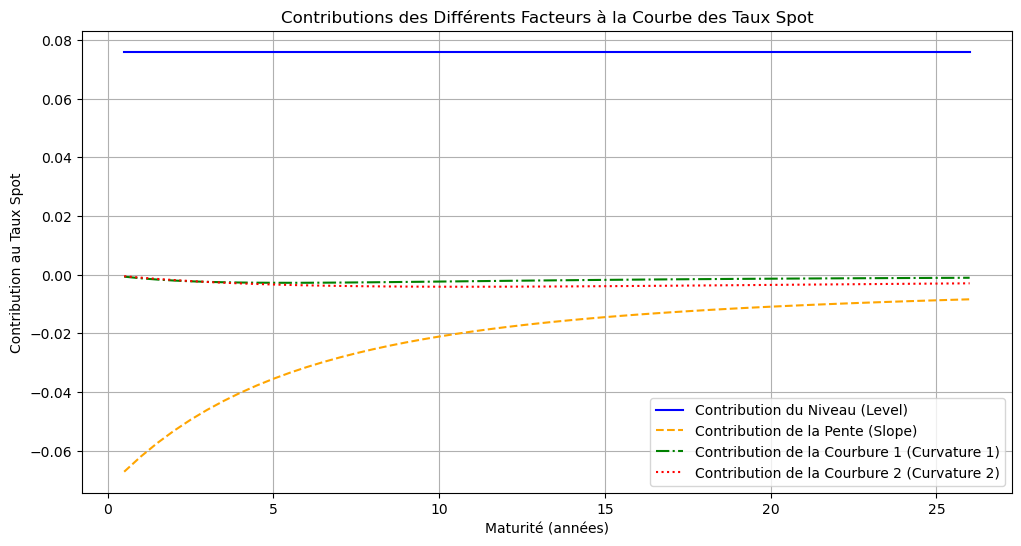

In [403]:
plt.figure(figsize=(12, 6))
plt.plot(all_maturities, spot_contribution_level, label="Contribution du Niveau (Level)", color='blue')
plt.plot(all_maturities, spot_contribution_slope, label="Contribution de la Pente (Slope)", linestyle='--', color='orange')
plt.plot(all_maturities, spot_contribution_curvature1, label="Contribution de la Courbure 1 (Curvature 1)", linestyle='-.', color='green')
plt.plot(all_maturities, spot_contribution_curvature2, label="Contribution de la Courbure 2 (Curvature 2)", linestyle=':', color='red')
plt.xlabel("Maturité (années)")
plt.ylabel("Contribution au Taux Spot")
plt.title("Contributions des Différents Facteurs à la Courbe des Taux Spot")
plt.legend()
plt.grid(True)
plt.show()

# Q4 : Hedging

In [747]:
cs_kdr_yield=np.array([yield_f[1],yield_f[4],((1/get_krd_price(10,0.005)[19])**(1/20)-1)*2,yield_f[10],yield_f[11]])

In [748]:
cs_kdr = CubicSpline(cs_maturity,cs_kdr_yield, bc_type='natural')

In [749]:
interpolated__kdryields = cs_kdr(all_maturities)

In [750]:
yield_f[9]-((1/get_krd_price(10,0.005)[19])**(1/20)-1)*2

array([-0.00678759])

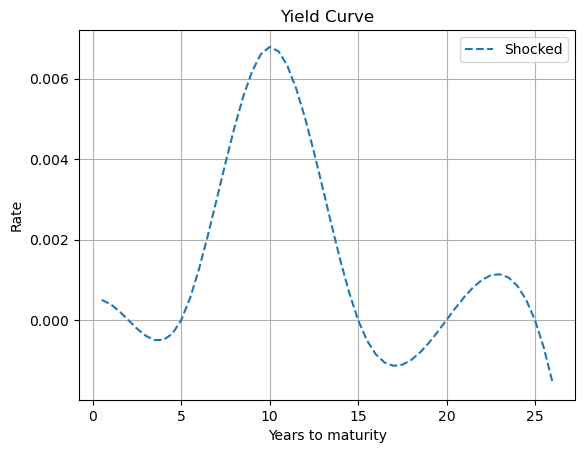

In [751]:
#plt.plot(all_maturities,interpolated_yields,'-',label='Yield curve')
plt.plot(all_maturities,interpolated__kdryields-interpolated_yields,'--',label='Shocked')
plt.xlabel('Years to maturity')
plt.ylabel('Rate')
plt.legend()
plt.title('Yield Curve')
#plt.xlim(0,20)
plt.grid()

In [582]:
kdr_price=np.ones(52)

In [596]:
for i in range(52):
    kdr_price[i] = (1/(((interpolated__kdryields[i][0]/2)+1)**(i+1)))

In [611]:
sum(kdr_price)*35452.89820148714

990234.8062046671

In [610]:
sum(35452.89820148714*discount_prices.reshape(52,))

1000000.0000000003

In [598]:
kdr_diff = kdr_price - discount_prices.reshape(52,)

In [612]:
sum(kdr_diff)*35452.89820148714

-9765.193795332847

In [647]:
def get_krd(og_yield,all,shock,mat):
    mat = int((mat-0.5) *2)
    krd_mat= np.ones(5,)
    if mat < 7 :
        l=[mat,9,19,29,39]
        for i,j in zip(l,range(5)):
            krd_mat[j]=all_maturities[i]
        krd_yield=np.array([og_yield[mat]+shock,og_yield[9],og_yield[19],og_yield[29],og_yield[39]])
        cs_getkrd = CubicSpline(krd_mat,krd_yield, bc_type='natural')
        ip_krd_yield = cs_getkrd(all)
    elif 7 <= mat < 15 :
        l=[2,mat,19,29,39]
        for i,j in zip(l,range(5)):
            krd_mat[j]=all_maturities[i]
        krd_yield=np.array([og_yield[3],og_yield[mat]+shock,og_yield[19],og_yield[29],og_yield[39]])
        cs_getkrd = CubicSpline(krd_mat,krd_yield, bc_type='natural')
        ip_krd_yield = cs_getkrd(all)
    elif 15 <= mat < 25 :
        l=[3,9,mat,29,39]
        for i,j in zip(l,range(5)):
            krd_mat[j]=all_maturities[i]
        krd_yield=np.array([og_yield[3],og_yield[9],og_yield[mat]+shock,og_yield[29],og_yield[39]])
        cs_getkrd = CubicSpline(krd_mat,krd_yield, bc_type='natural')
        ip_krd_yield = cs_getkrd(all)
    elif 25 <= mat < 39 :
        l=[3,9,19,mat,39]
        for i,j in zip(l,range(5)):
            krd_mat[j]=all_maturities[i]
        krd_yield=np.array([og_yield[3],og_yield[9],og_yield[19],og_yield[mat]+shock,og_yield[39]])
        cs_getkrd = CubicSpline(krd_mat,krd_yield, bc_type='natural')
        ip_krd_yield = cs_getkrd(all)
    elif 39 <= mat :
        l=[3,9,19,29,mat]
        for i,j in zip(l,range(5)):
            krd_mat[j]=all_maturities[i]
        krd_yield=np.array([og_yield[3],og_yield[9],og_yield[19],og_yield[29],og_yield[mat]+shock])
        cs_getkrd = CubicSpline(krd_mat,krd_yield, bc_type='natural')
        ip_krd_yield = cs_getkrd(all)

    krd_p = np.ones(len(all))
    for i in range(len(all)):
        krd_p[i] = (1/(((ip_krd_yield[i][0]/2)+1)**(i+1)))
    w=1000000/sum(discount_prices.reshape(52,))
    krd_diff = krd_p - discount_prices.reshape(52,)
    krd = sum(krd_diff)*w
    return krd

In [673]:
get_krd(yields,all_maturities, 0.005,9)

-13808.47508155081

In [742]:
def get_krds(all,shock):
    KRD = np.ones(52,)
    for k in range(len(all)):
        mm=(k/2)+0.5
        KRD[k]=get_krd2(mm,shock)
        print('KRD pour une maturité '+ str(mm) + ' : '+str(get_krd2(mm,shock)))
    return KRD

In [746]:
get_krds(all_maturities,0.005)

KRD pour une maturité 0.5 : -16.169532622865592
KRD pour une maturité 1.0 : -32.701264966095124
KRD pour une maturité 1.5 : -49.32022304084897
KRD pour une maturité 2.0 : -65.86410629223187
KRD pour une maturité 2.5 : -84.42254116935065
KRD pour une maturité 3.0 : -103.34528449362209
KRD pour une maturité 3.5 : -120.94048114178031
KRD pour une maturité 4.0 : -141.21473029540726
KRD pour une maturité 4.5 : -159.8488866068572
KRD pour une maturité 5.0 : -178.38655711376146
KRD pour une maturité 5.5 : -197.26008954215118
KRD pour une maturité 6.0 : -218.58682722770575
KRD pour une maturité 6.5 : -241.0151582071981
KRD pour une maturité 7.0 : -264.74463303471526
KRD pour une maturité 7.5 : -288.2174620293942
KRD pour une maturité 8.0 : -311.17002294376175
KRD pour une maturité 8.5 : -334.6031327178052
KRD pour une maturité 9.0 : -358.3285625040618
KRD pour une maturité 9.5 : -381.6674269154056
KRD pour une maturité 10.0 : -404.4830116407338
KRD pour une maturité 10.5 : -428.46736761286706


array([  -16.16953262,   -32.70126497,   -49.32022304,   -65.86410629,
         -84.42254117,  -103.34528449,  -120.94048114,  -141.2147303 ,
        -159.84888661,  -178.38655711,  -197.26008954,  -218.58682723,
        -241.01515821,  -264.74463303,  -288.21746203,  -311.17002294,
        -334.60313272,  -358.3285625 ,  -381.66742692,  -404.48301164,
        -428.46736761,  -472.50654144,  -517.55375715,  -562.53235925,
        -608.52520265,  -652.9526107 ,  -693.78359304,  -740.5253377 ,
        -790.00816463,  -842.84398276,  -897.64484642,  -954.49029099,
       -1010.42472466, -1070.59718404, -1134.84772413, -1197.08267581,
       -1263.38482418, -1331.73376652, -1397.910976  , -1465.75275908,
       -1529.70382614, -1605.18392877, -1683.54470898, -1766.04242913,
       -1845.34172084, -1919.18237613, -2002.55897993, -2087.57318581,
       -2172.85193669, -2258.33434639, -2339.51130061, -2419.84271022])

# Q5 : Portfolio Strategy

In [335]:
average_maturity = np.mean(all_maturities)

In [436]:
stochastic_component = np.random.normal(0, 0.0025,52)
deterministic_component = ((all_maturities - average_maturity)/average_maturity * 0.005)

In [437]:
y_steepen = yields_1D + deterministic_component + stochastic_component

In [438]:
y_steepen

array([0.00412348, 0.00742794, 0.01267306, 0.01676222, 0.02008862,
       0.01908853, 0.02425162, 0.0314742 , 0.03255332, 0.031744  ,
       0.03320984, 0.03702897, 0.04025101, 0.04304251, 0.04056454,
       0.04336802, 0.04503154, 0.04728719, 0.04530423, 0.0472064 ,
       0.04422662, 0.0527579 , 0.05363523, 0.05206261, 0.05514004,
       0.05240982, 0.05485604, 0.06168127, 0.0572905 , 0.05937869,
       0.05796099, 0.0625648 , 0.05766772, 0.06145696, 0.05844821,
       0.06235511, 0.06403334, 0.06227619, 0.0624575 , 0.06432082,
       0.06190613, 0.06355587, 0.06704654, 0.06539211, 0.06168136,
       0.06432665, 0.06034725, 0.06109615, 0.06216054, 0.06412428,
       0.06266712, 0.06057515])

In [439]:
y_steepen.shape

(52,)

In [440]:
yields_1D = yields.reshape(-1,)

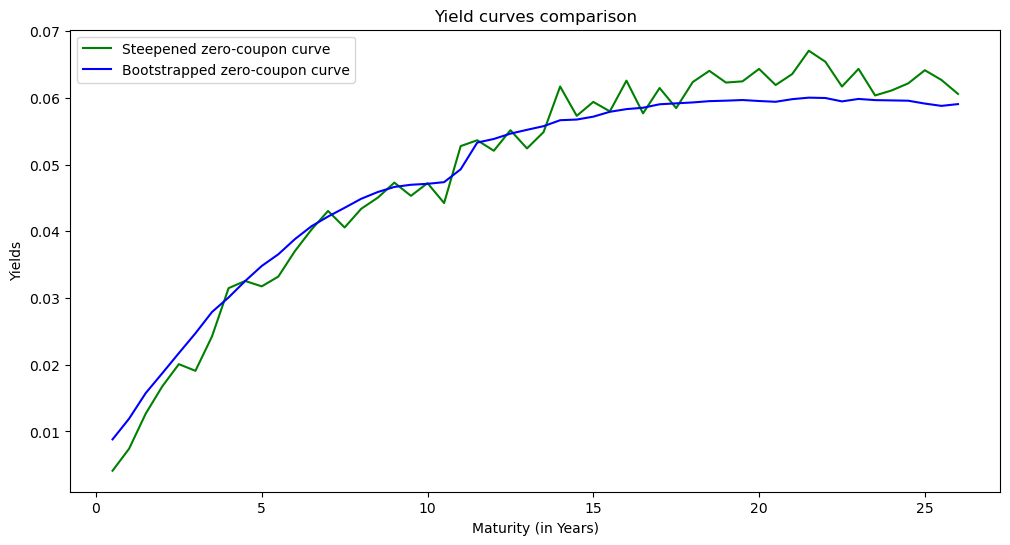

In [539]:
plt.figure(figsize=(12,6))
plt.plot(all_maturities, y_steepen, label='Steepened zero-coupon curve', color='green')
plt.plot(all_maturities, yields, label='Bootstrapped zero-coupon curve', color='blue')
plt.xlabel('Maturity (in Years)') 
plt.ylabel('Yields')
plt.title('Yield curves comparison')
plt.legend()
plt.grid
plt.show()

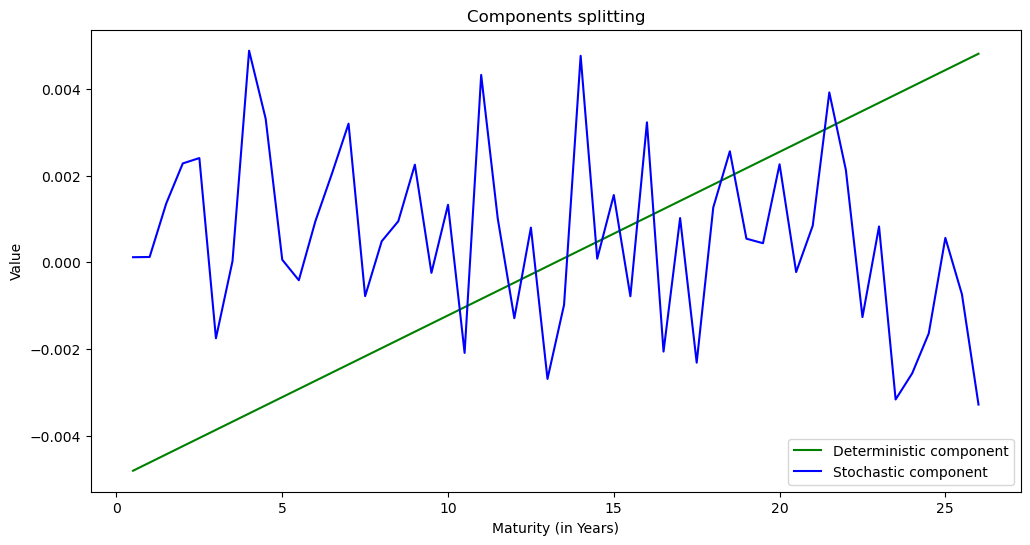

In [540]:
plt.figure(figsize=(12,6))
plt.plot(all_maturities, deterministic_component, label='Deterministic component', color='green')
plt.plot(all_maturities, stochastic_component, label='Stochastic component', color='blue')
plt.xlabel('Maturity (in Years)') 
plt.ylabel('Value')
plt.title('Components splitting')
plt.legend()
plt.grid
plt.show()

In [435]:
np.sqrt(0.0025)

0.05

In [470]:
nss_steep_yield=np.array([])
for i in cs_maturity:
    nss_steep_yield=np.append(nss_steep_yield,y_steepen[i*2-1])

In [471]:
initial_params_steep = [0.03, 0.015, 0.005, 0.003, 3, 6]

result_steep = minimize(objective, initial_params_steep, args=(cs_maturity, nss_steep_yield), method='L-BFGS-B')

beta0_steep, beta1_steep, beta2_steep, beta3_steep, tau1_steep, tau2_steep = result_steep.x

yield_curve_steep = nelson_siegel_svensson(all_maturities, beta0_steep, beta1_steep, beta2_steep, beta3_steep, tau1_steep, tau2_steep)

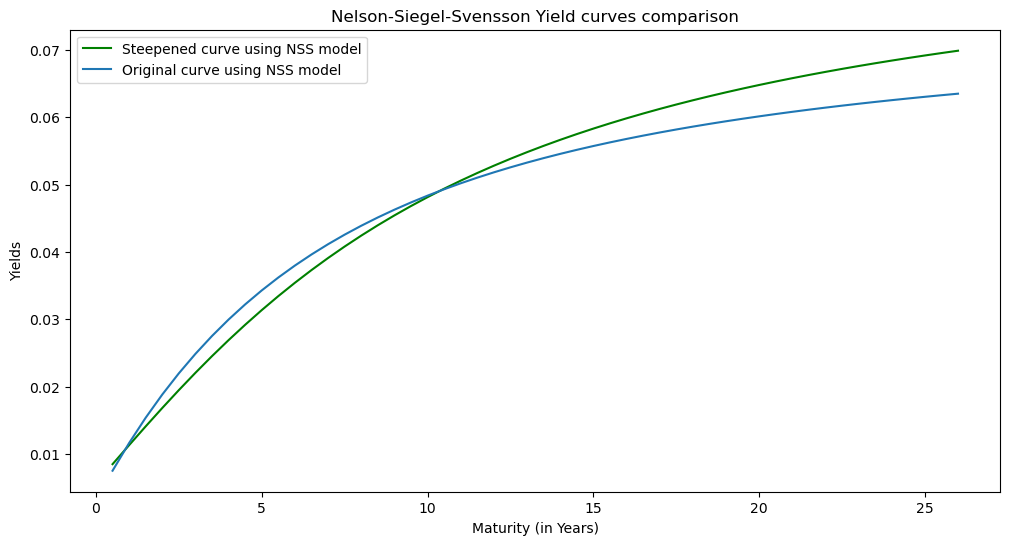

In [541]:
plt.figure(figsize=(12,6))
plt.plot(all_maturities, yield_curve_steep, label='Steepened curve using NSS model', color='green')
plt.plot(all_maturities, yield_curve_fitted, label='Original curve using NSS model')
#plt.plot(all_maturities, stochastic_component, label='Stochastic component', color='blue')
plt.xlabel('Maturity (in Years)') 
plt.ylabel('Yields')
plt.title('Nelson-Siegel-Svensson Yield curves comparison')
plt.legend()
plt.grid
plt.show()

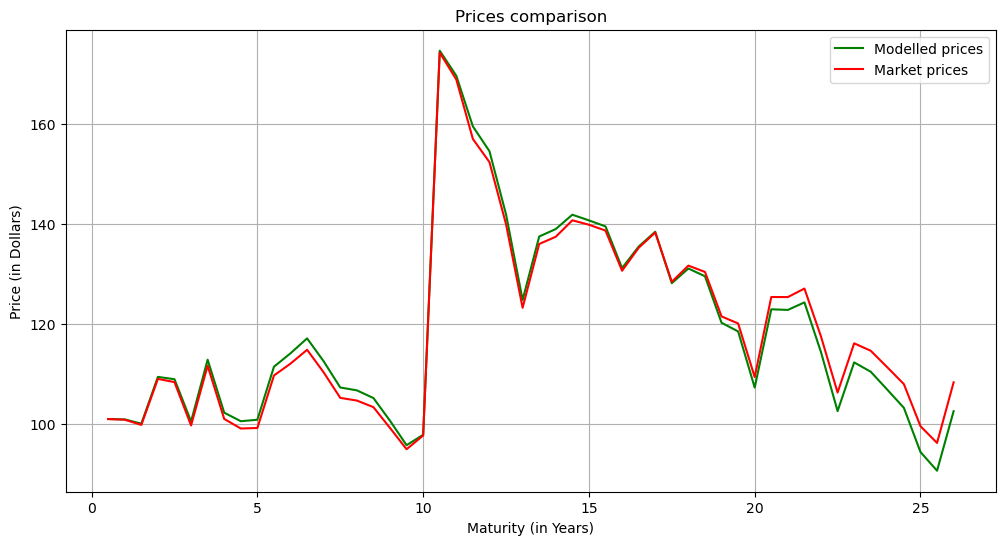

In [545]:
plt.figure(figsize=(12,6))
plt.plot(all_maturities, new_market_prices, label='Modelled prices', color='green')
plt.plot(all_maturities, market_price, label='Market prices',color='red')
#plt.plot(all_maturities, stochastic_component, label='Stochastic component', color='blue')
plt.xlabel('Maturity (in Years)') 
plt.ylabel('Price (in Dollars)')
plt.title('Prices comparison')
plt.legend()
plt.grid(True)
plt.show()

In [473]:
discount_matrix = 1/(1+yield_curve_steep)

In [479]:
for i in range(52):
    discount_matrix[i]=1/((1+yield_curve_steep[i])**((i+1)/2))

In [480]:
discount_matrix

array([0.9957704 , 0.98879092, 0.97918464, 0.96713392, 0.95286057,
       0.93660963, 0.91863624, 0.89919554, 0.87853514, 0.85688979,
       0.83447778, 0.81149889, 0.78813339, 0.76454195, 0.74086611,
       0.71722924, 0.69373771, 0.67048228, 0.6475395 , 0.62497318,
       0.60283574, 0.58116955, 0.56000817, 0.53937744, 0.51929656,
       0.49977896, 0.48083313, 0.46246339, 0.44467046, 0.42745208,
       0.41080348, 0.3947178 , 0.37918644, 0.36419944, 0.3497457 ,
       0.33581322, 0.32238934, 0.30946086, 0.29701424, 0.28503567,
       0.27351124, 0.26242697, 0.25176892, 0.24152324, 0.23167622,
       0.22221436, 0.21312436, 0.20439319, 0.19600808, 0.18795657,
       0.18022651, 0.17280605])

In [481]:
new_market_prices = cashflows @ discount_matrix

In [482]:
new_market_prices

array([101.07069542, 100.98768859, 100.14127386, 109.48875114,
       109.02157738, 100.5726292 , 112.92295616, 102.33159907,
       100.62858968, 100.92109007, 111.52001084, 114.20863953,
       117.18841908, 112.59943902, 107.36942327, 106.79880899,
       105.26374456, 100.72385847,  95.83554535,  97.91487769,
       174.69681112, 169.68628109, 159.56325604, 154.61215735,
       141.97736234, 124.86372045, 137.55375373, 139.04710969,
       141.91073209, 140.77758385, 139.57410348, 131.24565983,
       135.53978433, 138.50566707, 128.22884417, 131.16029086,
       129.60624488, 120.30700723, 118.57975237, 107.35774986,
       123.00181041, 122.87748449, 124.38212813, 114.429904  ,
       102.65035736, 112.38948657, 110.51668242, 106.92887048,
       103.29888744,  94.46999703,  90.7303425 , 102.63546354])

In [484]:
cheap_expensive = market_price - new_market_prices

In [485]:
cheap_expensive

array([-0.01629542, -0.06228859, -0.24707386, -0.39535114, -0.58357738,
       -0.7878292 , -1.20455616, -1.24749907, -1.45938968, -1.65009007,
       -1.74931084, -2.06363953, -2.28001908, -2.21003902, -2.07602327,
       -2.03810899, -1.82464456, -1.44325847, -0.80674535, -0.14557769,
       -0.37171112, -0.74738109, -2.50805604, -2.18995735, -1.96386234,
       -1.55932045, -1.49395373, -1.54310969, -1.11873209, -0.86968385,
       -0.83100348, -0.52945983, -0.24598433, -0.15906707,  0.27065583,
        0.57380914,  0.86735512,  1.27299277,  1.59464763,  2.09605014,
        2.45818959,  2.56911551,  2.76557187,  3.120996  ,  3.71224264,
        3.80911343,  4.19191758,  4.47472952,  4.74021256,  5.16300297,
        5.5572575 ,  5.77073646])

In [486]:
#positive over value - negative undervalued

In [ ]:
#sélectionner des maturités différentes, des coupons différents

In [489]:
expensive = cheap_expensive > 0

In [490]:
sum(expensive)

18

In [491]:
cheap = cheap_expensive < 0

In [492]:
sum(cheap)

34

In [493]:
expensive

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [496]:
expensive[34:52]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [498]:
sum(market_price[34:52])

2098.5598999999997

In [565]:
weight = np.ones_like(all_maturities)
weight = weight * 1/52

def obj_0(weights):
    return abs(weights @ desired_mp)

In [515]:
weight @ market_price

119.13847884615386

In [516]:
weight[34:52] = weight[34:52]*-1

In [519]:
opti_weight = opti_ptf.x

In [520]:
opti_weight @ market_price

-5.438577028726854e-07

In [521]:
sum(opti_weight)

-0.007020192855564027

In [526]:
abs(opti_weight) @ abs(cheap_expensive)

1.899267062372719

In [554]:
returns = np.ones(10,)
for i,j in zip([6, 10, 15, 23, 28, 37, 42, 45, 47, 52],range(10)):
    returns[j] = cheap_expensive[i-1]

In [555]:
desired_mp = np.ones(10,)
for i,j in zip([6, 10, 15, 23, 28, 37, 42, 45, 47, 52],range(10)):
    desired_mp[j] = market_price[i-1]

In [556]:
desired_model_price = np.ones(10,)
for i,j in zip([6, 10, 15, 23, 28, 37, 42, 45, 47, 52],range(10)):
    desired_model_price[j] = new_market_prices[i-1]

In [557]:
desired_mp

array([ 99.7848,  99.271 , 105.2934, 157.0552, 137.504 , 130.4736,
       125.4466, 106.3626, 114.7086, 108.4062])

In [558]:
desired_model_price

array([100.5726292 , 100.92109007, 107.36942327, 159.56325604,
       139.04710969, 129.60624488, 122.87748449, 102.65035736,
       110.51668242, 102.63546354])

In [559]:
weeight = np.ones(10,)

In [561]:
weeight[5:10]=-weeight[5:10]

In [563]:
weeight

array([ 1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.])

In [566]:
opti_ptf = minimize(obj_0, weeight, method='L-BFGS-B')

In [567]:
opti_ptf.x

array([ 0.99060214,  0.99065054,  0.99008333,  0.98520835,  0.98704969,
       -1.01228817, -1.01181472, -1.01001737, -1.0108034 , -1.01020983])

In [568]:
final_weights = opti_ptf.x

In [569]:
long_short_return = final_weights * (desired_mp - desired_model_price)

In [570]:
long_short_return

array([-0.78042529, -1.63466262, -2.05543604, -2.47095775, -1.52312594,
       -0.87801332, -2.59946888, -3.74942953, -4.23720455, -5.82965468])

In [571]:
sum(abs(long_short_return))

25.75837860520882

In [572]:
final_weights @ desired_mp

-3.1061709648838587e-07

In [573]:
market_price

array([101.0544, 100.9254,  99.8942, 109.0934, 108.438 ,  99.7848,
       111.7184, 101.0841,  99.1692,  99.271 , 109.7707, 112.145 ,
       114.9084, 110.3894, 105.2934, 104.7607, 103.4391,  99.2806,
        95.0288,  97.7693, 174.3251, 168.9389, 157.0552, 152.4222,
       140.0135, 123.3044, 136.0598, 137.504 , 140.792 , 139.9079,
       138.7431, 130.7162, 135.2938, 138.3466, 128.4995, 131.7341,
       130.4736, 121.58  , 120.1744, 109.4538, 125.46  , 125.4466,
       127.1477, 117.5509, 106.3626, 116.1986, 114.7086, 111.4036,
       108.0391,  99.633 ,  96.2876, 108.4062])